In [1]:
# processing
import numpy as np
import pandas as pd

# custom package
import tregs

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Part a)

In [2]:
emat = np.random.uniform(low=-5, high=2, size=(4, 5))
additive = [[1, 0, 0, 0, 1],
            [0, 0, 1, 0, 0],
            [0, 1, 0, 0, 0],
            [0, 0, 0, 1, 0]]
additive = np.asarray(additive) * 7
emat = emat + additive

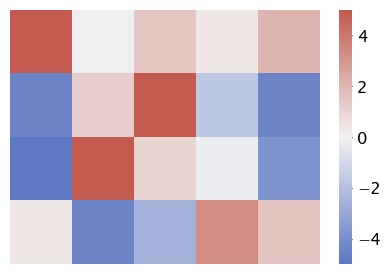

In [3]:
div_colors = sns.diverging_palette(258, 16, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)

fig, ax = plt.subplots(figsize=(5, 3.3))
sns.heatmap(emat, cmap=div_colors, ax=ax, vmin=-5, vmax=5)
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,
    labelbottom=False)
plt.tick_params(
    axis='y',          
    which='both',      
    left=False,
    labelleft=False)

plt.savefig('../plots/fig2/em1.pdf', dpi=300)
plt.show()

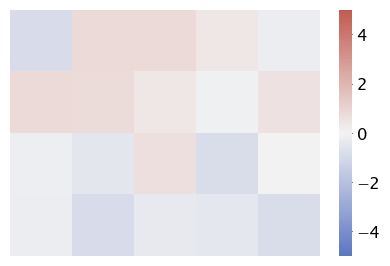

In [4]:
emat2 = np.random.uniform(low=-1, high=1, size=(4, 5))

div_colors = sns.diverging_palette(258, 16, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)

fig, ax = plt.subplots(figsize=(5, 3.2))
sns.heatmap(emat2, cmap=div_colors, ax=ax, vmin=-5, vmax=5)
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,
    labelbottom=False)
plt.tick_params(
    axis='y',          
    which='both',      
    left=False,
    labelleft=False)

plt.savefig('../plots/fig2/em2.pdf', dpi=300)
plt.show()

### Part b)

In [5]:
# Promoter
rnap_site = 'CAGGCTTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG'

In [6]:
# obtained from https://journals.plos.org/ploscompbiol/article/figure?id=10.1371/journal.pcbi.1002811.g002

rnap_emat_raw = np.loadtxt('../../data/energy_matrices/RNAP_energy_matrix.txt')
rnap_emat = tregs.simulate.fix_wt(rnap_emat_raw, rnap_site)

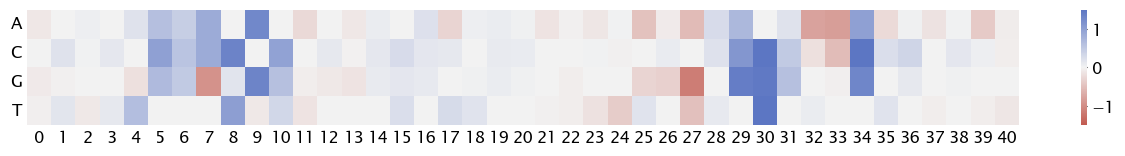

In [7]:
fig, ax = plt.subplots(figsize=(16, 1.5))
div_colors = sns.diverging_palette(16, 258, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)
sns.heatmap(rnap_emat.T, cmap=div_colors, ax=ax, vmax=1.5, vmin=-1.5)
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
plt.savefig('../plots/fig2/rnap-emat.pdf', dpi=300)
plt.show()

In [8]:
# LacI binding site
rep_site = 'AATTGTGAGCGGATAACAATT'

O1_1027_raw = np.load('../../data/energy_matrices/lacThermoforTO1.npy')

O1_1027_fixed = np.zeros(np.shape(O1_1027_raw))
for i in range(3):
    O1_1027_fixed[i] = tregs.simulate.fix_wt(O1_1027_raw[i], rep_site)

rep_emat = np.mean(O1_1027_fixed, axis=0)

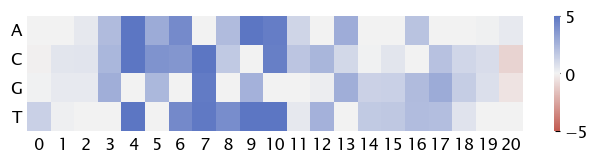

In [9]:
fig, ax = plt.subplots(figsize=(8, 1.5))

div_colors = sns.diverging_palette(16, 258, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)
sns.heatmap(rep_emat.T, cmap=div_colors, ax=ax, vmin=-5, vmax=5)
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
plt.savefig('../plots/fig2/lacI-emat.pdf', dpi=300)
plt.show()

In [10]:
# energy matrix obtained from Fig 3. of Kinney et al., 2010 (https://www.pnas.org/doi/full/10.1073/pnas.1004290107)
# elements expressed in kcal/mol (1 kcal/mol = 1.62kbT)

crp_emat_raw = pd.read_table('../../data/energy_matrices/crp_tau_final_all_26.txt', delim_whitespace=True)
crp_emat = crp_emat_raw[['par_A', 'par_C', 'par_G', 'par_T']].to_numpy().T * 1.62

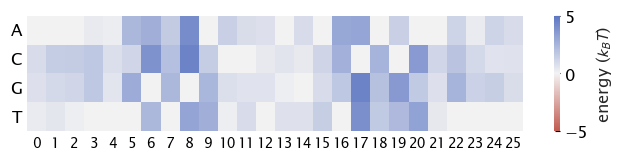

In [11]:
div_colors = sns.diverging_palette(16, 258, s=56, l=51, n=15, sep=2, center='light', as_cmap=True)

fig, ax = plt.subplots(figsize=(8, 1.5))
sns.heatmap(crp_emat, cmap=div_colors, ax=ax, vmin=-5, vmax=5,
            cbar_kws={'label': r'energy ($k_BT$)'})
ax.set_yticklabels(['A', 'C', 'G', 'T'], rotation=360)
ax.set_xticklabels(np.arange(26), rotation=360, fontsize=10)
plt.savefig('../plots/fig2/crp-emat.pdf', dpi=300)
plt.show()